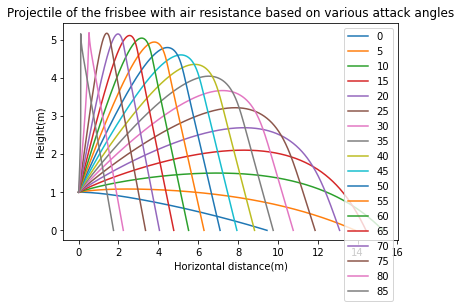

In [1]:
from typing import MappingView
import math
import matplotlib.pyplot as plt
import random
g1=[]
g2=[]
for k in range(0,90,5): #angles to be considered 
  #Initial angles 
  theta_0=k*math.pi/180 #initial angle 
  beta_0=k*math.pi/180 #initial inclination angle 

  alpha_0=abs(beta_0-theta_0) #initial attack angle 

  drift_angle_0=(theta_0+math.pi)%(2*math.pi) #inital drift angle 
  lift_angle_0=(theta_0+math.pi/2)%(2*math.pi) #initial lift angle

  #Properties of the frisbee:
  m=0.145 #mass of the frisbee in kilogram
  d=0.20 #diameter of the frisbee in meter
  A=0.05309 #surface area of the frisbee in meter square
  p=1.23 #density of air at sea level in kilogram per meter cube
  C_Drag_0=0.085+3.30*(alpha_0 -(- 0.052))**2 #initial drag coefficient of the frisbee
  C_Lift_0=0.13+3.09*alpha_0 #initial lift coefficient of the frisbee

  #Initial conditions for projectile motion
  g=-9.81 #Earth's gravitional acceleration
  v_0=9
  x_0=0
  y_0=1
  F_drag_0=0.5*p*A*C_Drag_0*v_0**2 #inital Drag force (antiparallel to initial velocity vector)
  F_lift_0=0.5*p*A*C_Lift_0*v_0**2 #initial Lift force (orthogonal to initial velocity vector)
  DT=0.0001
  t_max=6
  STEPS=int(t_max/DT)
  nbr_data_points=50
  data_counter=int(STEPS/nbr_data_points)

  #Creating lists for all variables
  C_Drag=[C_Drag_0,]
  C_Lift=[C_Lift_0]
  alpha=[alpha_0,]
  drift_angle=[drift_angle_0,]
  lift_angle=[lift_angle_0,]
  F_drag=[F_drag_0,]
  F_lift=[F_lift_0,]
  ax=[1/m*(F_lift_0*math.cos(lift_angle_0)+F_drag_0*math.cos(drift_angle_0)),]
  ay=[1/m*(F_lift_0*math.sin(lift_angle_0)+F_drag_0*math.cos(drift_angle_0)+ m*g),]
  vx=[v_0*math.cos(theta_0),]
  vy=[v_0*math.sin(theta_0),]
  x=[x_0,]
  y=[y_0,]

  #Projectile with Euler's method
  for i in range(STEPS):
    if y[i]<0:
      break

    theta=math.atan(vy[i]/vx[i])

    beta=beta_0 #we assume the inclination ange is constant throughout the flight 
    alpha.append(abs(beta-theta))

    ax.append(1/m * (F_lift[i]*math.cos(lift_angle[i])+F_drag[i]*math.cos(drift_angle[i])))
    ay.append(1/m * (F_lift[i]*math.sin(lift_angle[i]) + F_drag[i]*math.sin(lift_angle[i]) + m*g))

    vx.append(vx[i]+ax[i]*DT)
    vy.append(vy[i]+ay[i]*DT)

    C_Drag.append(0.085+3.30*(alpha[i] - (-0.052))**2)
    C_Lift.append(0.13+3.09*alpha[i])

    drift_angle.append((theta+math.pi)%(2*math.pi))
    lift_angle.append((theta+math.pi/2)%(2*math.pi))

    v=vx[i]/math.cos(theta)

    F_drag.append(0.5*p*A*C_Drag[i]*v**2)
    F_lift.append(0.5*p*A*C_Lift[i]*v**2)

    x.append(x[i]+vx[i]*DT)
    y.append(y[i]+vy[i]*DT)

  g1.append(x) #storing lists of x - values
  g2.append(y) #storing lists of y - values

#Plotting the graph
fig=plt.figure()
for j in range(len(g1)):
  plt.plot(g1[j],g2[j], label=j*5)
  plt.legend(loc="upper right")
  #n = random.choice(range(math.floor(len(x)/1)))
  #plt.annotate(f"({math.degrees(j*5*math.pi/180):.0f}, {math.degrees((j*5*math.pi/180)):.0f})", xy=(x[-n], y[-n]),fontsize=8)
  plt.title("Projectile of the frisbee with air resistance based on various attack angles")
  plt.xlabel("Horizontal distance(m)")
  plt.ylabel("Height(m)")

plt.show()
